In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Final_CSVs/singal_csv/shuffled_combine_dataset.csv')

In [3]:
print(df.describe().T)

                            count          mean            std           min  \
img_no                    11832.0   5915.500000    3415.748527  0.000000e+00   
area                      11832.0  12107.747295   33344.483685  7.100000e+01   
bbox-0                    11832.0    152.872972     145.501337  0.000000e+00   
bbox-1                    11832.0    180.229462     178.493655  0.000000e+00   
bbox-2                    11832.0    252.858857     150.493227  1.000000e+00   
bbox-3                    11832.0    299.469912     195.293846  1.000000e+00   
bbox_area                 11832.0  33020.895791   84308.766262  7.200000e+01   
centroid-0                11832.0    202.416966     133.737039  0.000000e+00   
centroid-1                11832.0    239.987850     168.447276  0.000000e+00   
convex_area               11832.0  26765.656271   71348.842186  7.200000e+01   
eccentricity              11832.0      0.848338       0.142836  1.245593e-01   
equivalent_diameter       11832.0     67

In [4]:
print(df.isnull().sum())

img_no                      0
area                        0
bbox-0                      0
bbox-1                      0
bbox-2                      0
bbox-3                      0
bbox_area                   0
centroid-0                  0
centroid-1                  0
convex_area                 0
eccentricity                0
equivalent_diameter         0
euler_number                0
extent                      0
filled_area                 0
inertia_tensor_eigvals-0    0
inertia_tensor_eigvals-1    0
local_centroid-0            0
local_centroid-1            0
major_axis_length           0
minor_axis_length           0
moments_hu-0                0
moments_hu-1                0
moments_hu-2                0
moments_hu-3                0
moments_hu-4                0
moments_hu-5                0
moments_hu-6                0
orientation                 0
perimeter                   0
slice                       0
solidity                    0
label                       0
dtype: int

In [5]:
print(df.dtypes)

img_no                        int64
area                          int64
bbox-0                        int64
bbox-1                        int64
bbox-2                        int64
bbox-3                        int64
bbox_area                     int64
centroid-0                  float64
centroid-1                  float64
convex_area                   int64
eccentricity                float64
equivalent_diameter         float64
euler_number                  int64
extent                      float64
filled_area                   int64
inertia_tensor_eigvals-0    float64
inertia_tensor_eigvals-1    float64
local_centroid-0            float64
local_centroid-1            float64
major_axis_length           float64
minor_axis_length           float64
moments_hu-0                float64
moments_hu-1                float64
moments_hu-2                float64
moments_hu-3                float64
moments_hu-4                float64
moments_hu-5                float64
moments_hu-6                

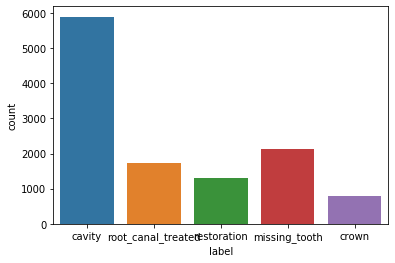

In [6]:
sns.countplot(x='label', data=df)

In [7]:
print(df['label'].value_counts())

cavity                5892
missing_tooth         2123
root_canal_treated    1729
restoration           1298
crown                  790
Name: label, dtype: int64


In [8]:
y = df['label'].values
print(np.unique(y))

['cavity' 'crown' 'missing_tooth' 'restoration' 'root_canal_treated']


In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y)
print(np.unique(Y))

[0 1 2 3 4]


In [10]:
X = df.drop(labels = ['label', 'img_no', 'slice'], axis=1)
print(X.describe().T)

                            count          mean            std           min  \
area                      11832.0  12107.747295   33344.483685  7.100000e+01   
bbox-0                    11832.0    152.872972     145.501337  0.000000e+00   
bbox-1                    11832.0    180.229462     178.493655  0.000000e+00   
bbox-2                    11832.0    252.858857     150.493227  1.000000e+00   
bbox-3                    11832.0    299.469912     195.293846  1.000000e+00   
bbox_area                 11832.0  33020.895791   84308.766262  7.200000e+01   
centroid-0                11832.0    202.416966     133.737039  0.000000e+00   
centroid-1                11832.0    239.987850     168.447276  0.000000e+00   
convex_area               11832.0  26765.656271   71348.842186  7.200000e+01   
eccentricity              11832.0      0.848338       0.142836  1.245593e-01   
equivalent_diameter       11832.0     67.475814     104.230492  9.507892e+00   
euler_number              11832.0    -35

In [11]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)
print(X)

[[1.69426364e-03 0.00000000e+00 1.63884674e-01 ... 1.92256692e-05
  2.00022816e-02 6.35479047e-01]
 [5.94556899e-04 6.05468750e-01 8.16388467e-01 ... 8.02609935e-01
  3.14801673e-03 6.37100830e-01]
 [1.40279665e-02 7.83203125e-01 0.00000000e+00 ... 9.66262079e-01
  4.96477730e-02 1.39480139e-01]
 ...
 [4.39659180e-02 1.58203125e-01 3.96054628e-01 ... 9.48401772e-01
  8.87223330e-02 5.98231981e-01]
 [1.60485659e-03 0.00000000e+00 1.63884674e-01 ... 1.00000000e+00
  1.90439592e-02 1.00000000e+00]
 [1.75416637e-02 8.59375000e-02 0.00000000e+00 ... 3.89930230e-01
  3.40707511e-02 6.17437937e-01]]


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8282, 30)
(3550, 30)
(8282,)
(3550,)


In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [46]:
model = Sequential()
model.add(Dense(128, input_dim=30, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Activation('sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               3968      
_________________________________________________________________
dense_38 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_39 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_40 (Dense)             (None, 16)                528       
_________________________________________________________________
activation_9 (Activation)    (None, 16)                0         
Total params: 14,832
Trainable params: 14,832
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
history = model.fit(x_train, y_train, verbose=1, epochs=100, batch_size=128, 
                   validation_data=(x_test, y_test))

Epoch 1/150
65/65 [==============================] - 1s 6ms/step - loss: 2.7268 - accuracy: 0.1705 - val_loss: 2.4638 - val_accuracy: 0.4915
Epoch 2/150
65/65 [==============================] - 0s 3ms/step - loss: 2.3403 - accuracy: 0.4981 - val_loss: 1.9126 - val_accuracy: 0.4921
Epoch 3/150
65/65 [==============================] - 0s 3ms/step - loss: 1.7935 - accuracy: 0.5098 - val_loss: 1.6223 - val_accuracy: 0.4921
Epoch 4/150
65/65 [==============================] - 0s 3ms/step - loss: 1.5766 - accuracy: 0.4972 - val_loss: 1.4729 - val_accuracy: 0.4921
Epoch 5/150
65/65 [==============================] - 0s 3ms/step - loss: 1.4489 - accuracy: 0.4958 - val_loss: 1.4165 - val_accuracy: 0.4921
Epoch 6/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3895 - accuracy: 0.5042 - val_loss: 1.3941 - val_accuracy: 0.4921
Epoch 7/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3864 - accuracy: 0.4986 - val_loss: 1.3866 - val_accuracy: 0.4921
Epoch 8/150
6

Epoch 59/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3423 - accuracy: 0.5111 - val_loss: 1.3679 - val_accuracy: 0.4921
Epoch 60/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3563 - accuracy: 0.5010 - val_loss: 1.3677 - val_accuracy: 0.4921
Epoch 61/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3579 - accuracy: 0.5014 - val_loss: 1.3683 - val_accuracy: 0.4921
Epoch 62/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3589 - accuracy: 0.5024 - val_loss: 1.3688 - val_accuracy: 0.4921
Epoch 63/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3505 - accuracy: 0.5056 - val_loss: 1.3676 - val_accuracy: 0.4921
Epoch 64/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3588 - accuracy: 0.5026 - val_loss: 1.3694 - val_accuracy: 0.4921
Epoch 65/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3591 - accuracy: 0.4999 - val_loss: 1.3687 - val_accuracy: 0.4921
Epoch 

65/65 [==============================] - 0s 3ms/step - loss: 1.3541 - accuracy: 0.5022 - val_loss: 1.3677 - val_accuracy: 0.4921
Epoch 117/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3546 - accuracy: 0.5037 - val_loss: 1.3677 - val_accuracy: 0.4921
Epoch 118/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3605 - accuracy: 0.4980 - val_loss: 1.3680 - val_accuracy: 0.4921
Epoch 119/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3564 - accuracy: 0.4977 - val_loss: 1.3699 - val_accuracy: 0.4921
Epoch 120/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3620 - accuracy: 0.4971 - val_loss: 1.3673 - val_accuracy: 0.4921
Epoch 121/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3633 - accuracy: 0.4953 - val_loss: 1.3687 - val_accuracy: 0.4921
Epoch 122/150
65/65 [==============================] - 0s 3ms/step - loss: 1.3584 - accuracy: 0.4994 - val_loss: 1.3676 - val_accuracy: 0.4921
Epoch 123/150

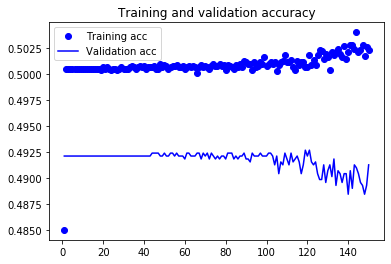

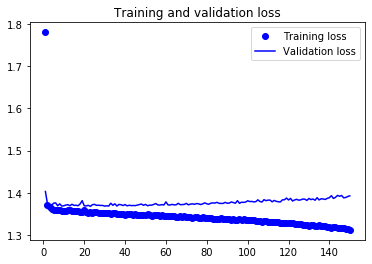

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()